# Importación de librerías

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Librerías de métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Librerías de modelos
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

# Librerías de búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import KFold


# Importación de datos

In [21]:
disp_df = pd.read_csv("datos/disp_st2ns1.txt.bz2",
    compression="bz2",
    index_col=0)

comp_df = pd.read_csv("comp_st2ns1.txt.bz2",
    compression="bz2",
    index_col=0)

# Analisis Exploratorio de Datos

Comprobamos la cantidad de datos que tenemos en el dataset

In [32]:
disp_df_eda = disp_df.copy()

print('Cantidad de Filas y columnas:', disp_df_eda.shape)
print('Nombre columnas:', disp_df_eda.columns)

Cantidad de Filas y columnas: (4380, 76)
Nombre columnas: Index(['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1',
       'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1',
       'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1',
       'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1',
       'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1',
       'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1',
       'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1',
       'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1',
       'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1',
       'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1',
       'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1',
       'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1',
       'ulwrf_s1_1

In [33]:
disp_df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

In [35]:
disp_df_eda.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.606809,0.252764,0.480446,0.271476,0.514641,316.698532,317.381851,324.682998,343.757513,343.097254,...,247.300145,251.597699,261.916025,260.870143,0.076235,38.585222,76.064674,126.504047,99.087049,1.629826e+07
std,2.275740,0.999809,1.774720,1.086599,1.886735,55.637609,57.874376,58.702133,60.860672,60.693451,...,36.804219,36.382653,39.190955,38.734023,0.255491,25.984861,30.784078,40.571154,35.454368,7.965298e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,158.971770,160.032903,165.524543,183.671312,186.342961,...,113.559602,118.679132,119.393449,121.951425,0.000000,0.000000,3.181818,4.363636,2.545455,5.100000e+05
25%,0.000000,0.000000,0.000000,0.000000,0.000000,271.219564,268.889864,275.709318,293.757163,292.834810,...,230.482578,233.976283,245.721419,243.850282,0.000000,14.000000,53.431818,108.454545,74.795455,1.062375e+07
50%,0.000000,0.000000,0.000000,0.000000,0.000000,321.106932,323.063311,329.708327,346.763388,345.883918,...,253.309217,257.270334,270.790095,269.300432,0.000000,35.363636,79.272727,135.909091,104.818182,1.635690e+07
75%,0.109091,0.051818,0.127500,0.036364,0.090909,366.145476,370.147353,378.509126,399.600853,398.728281,...,274.861445,278.800420,290.139446,289.699652,0.000000,61.818182,102.727273,155.204545,129.545455,2.312775e+07
max,43.009090,16.846364,28.399091,26.381818,36.875455,426.173970,427.486894,429.693146,455.566337,453.910406,...,311.991660,315.569164,328.920274,327.253141,1.000000,92.272727,192.636364,450.636364,313.909091,3.122700e+07


Tomamos una muestra de las 15 variables en el primer momento del día siguiente para ver como se distribuyen los datos

In [40]:
for field in disp_df_eda:
    if field[-3] != "i" and int(field[-3]) != 1:
        disp_df_eda.drop(field, axis=1, inplace=True)

Detección de valores atípicos

-3.9446717712080748
5.158289456511513


<Axes: >

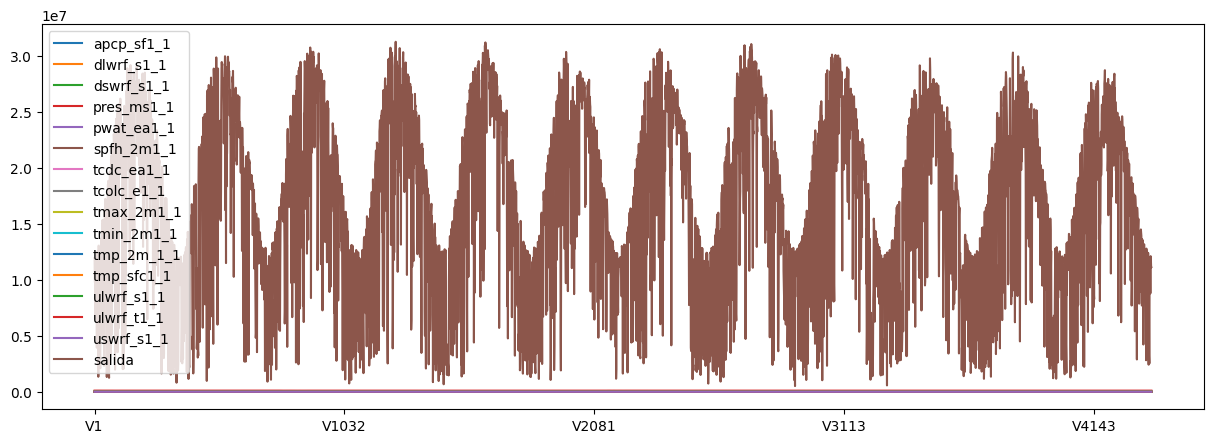

In [42]:
disp_df_outliers = disp_df.copy()
disp_df_std = disp_df_outliers.std()
disp_df_mean = disp_df_outliers.mean()
anomaly_cut_off = disp_df_std * 2
lower_limit  = disp_df_mean - anomaly_cut_off
upper_limit = disp_df_mean + anomaly_cut_off

print(lower_limit.iloc[0])
print(upper_limit.iloc[0])

for index, row in disp_df_outliers.iterrows():
    if row.iloc[0] < lower_limit.iloc[0] or row.iloc[0] > upper_limit.iloc[0]:
        disp_df_outliers.drop(index, inplace=True)

disp_df_outliers.plot(kind='line', figsize=(15, 5))

Correlación entre variables

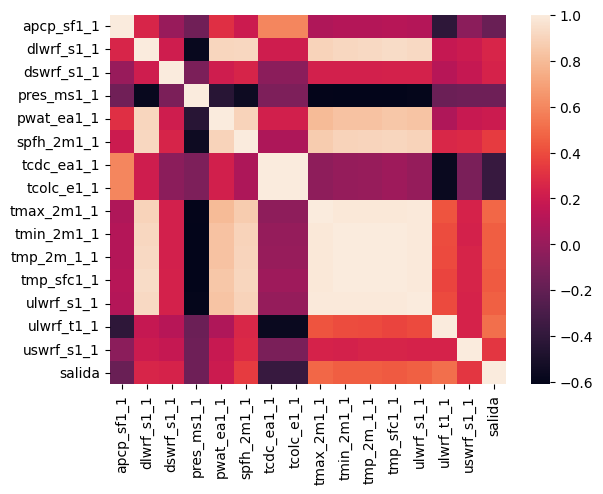

In [23]:
corr = disp_df_eda.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

Podemos observar que las variables que mayor correlacción positiva presentan son aquellas correspondientes a la temperatura (tmax_2m1,...,tmp_sfc1) con la variable de ulwrf_t1.
corr negativa (pres_ms1 -> dlwrf_s1); (spfh_2m1 -> pres_ms1); (tmax_2m1-ulwrf_s1 -> pres_ms1); (ulwrf_t1 -> tcdc_ea1-tcolc_e1)

# Preparación de datos
## Train, test y validación

Dividimos los datos en los conjuntos de train y test. A su vez dividimos el conjunto de train para preparar las comparaciones entre los diferentes modelos.

In [3]:
train = disp_df.iloc[:10*365]
test = disp_df.iloc[10*365:]

train_train = train.iloc[:8*365]
train_validation = train.iloc[8*365:]

#separamos la variable objetivo en los sets de entrenamiento y validación
X_train_train = train_train.iloc[:, :75]
Y_train_train = train_train.iloc[:, 75]

X_train_validation = train_validation.iloc[:, :75]
Y_train_validation = train_validation.iloc[:, 75]


## Creación de un modelo dummy

In [4]:
#create a dummy regressor using the median to compare
dummy = DummyRegressor(strategy="median")
dummy.fit(X_train_train, Y_train_train)
dummy_pred = dummy.predict(X_train_validation)

dummy_mae = mean_absolute_error(Y_train_validation, dummy_pred)
print("dummy MAE: ",dummy_mae)

dummy_rmse = np.sqrt(mean_squared_error(Y_train_validation,dummy_pred))
print("dummy RMSE: ", dummy_rmse)

dummy MAE:  6720947.2602739725
dummy RMSE:  7809144.902737563


# Métodos Básicos
## Creación de modelos
Usamos KNeighborsRegressor 

In [45]:
start = time.time()
KNN_reg = KNeighborsRegressor()

scaler_x = StandardScaler()
X_train_train_norm = scaler_x.fit_transform(X_train_train)
X_train_validation_norm = scaler_x.transform(X_train_validation)

scaler_y = StandardScaler()
Y_train_train_norm = scaler_y.fit_transform(Y_train_train.values.reshape(-1, 1)).ravel()
Y_train_validation_norm = scaler_y.transform(Y_train_validation.values.reshape(-1, 1)).ravel()

KNN_reg.fit(X_train_train_norm, Y_train_train_norm)
KNN_reg_pred_norm = KNN_reg.predict(X_train_validation_norm)
KNN_reg_pred = scaler_y.inverse_transform(KNN_reg_pred_norm.reshape(-1, 1)).ravel()

end = time.time()

# Métricas
KNN_reg_mae = mean_absolute_error(Y_train_validation, KNN_reg_pred)
print("MAE: ", KNN_reg_mae)


KNN_reg_rmse = np.sqrt(mean_squared_error(Y_train_validation, KNN_reg_pred))
print("RMSE: ", KNN_reg_rmse)


print("Puntuación: ", KNN_reg.score(X_train_validation_norm, Y_train_validation_norm))
print("Tiempo de ejecución: ", end - start)

MAE:  2536714.7671232875
RMSE:  3675153.3534838464
Puntuación:  0.777642376391267
Tiempo de ejecución:  0.03590273857116699


Procedemos a usar arboles de regresión

In [46]:
start = time.time()

tree_reg = DecisionTreeRegressor(random_state=2)
tree_reg.fit(X_train_train, Y_train_train)
tree_reg_pred = tree_reg.predict(X_train_validation)

end = time.time()

tree_reg_mae = mean_absolute_error(Y_train_validation, tree_reg_pred)
print("model MAE: ", tree_reg_mae)

tree_reg_rmse = np.sqrt(mean_squared_error(Y_train_validation, tree_reg_pred))
print("model rmse: ", tree_reg_rmse)

print("Puntuación: ", tree_reg.score(X_train_validation, Y_train_validation))
print("Tiempo de ejecución: ", end - start)


model MAE:  3344148.493150685
model rmse:  4829894.676721137
Puntuación:  0.6159600420419615
Tiempo de ejecución:  0.16257381439208984


Usamos regresion lineal

In [47]:
start = time.time()

li_reg = LinearRegression()
li_reg.fit(X_train_train, Y_train_train)
li_reg_pred = li_reg.predict(X_train_validation)

end = time.time()

li_reg_mae = mean_absolute_error(Y_train_validation, li_reg_pred)
print("model MAE: ", li_reg_mae)

li_reg_rmse = np.sqrt(mean_squared_error(Y_train_validation, li_reg_pred))
print("model rmse: ", li_reg_rmse)

print("Puntuación: ", li_reg.score(X_train_validation, Y_train_validation))
print("Tiempo de ejecución: ", end - start)


model MAE:  2265683.8029644764
model rmse:  3268115.476041282
Puntuación:  0.8241688243985801
Tiempo de ejecución:  0.033890485763549805


## Ajuste de hiperparámetros por búsqueda en cuadrícula

### KNeighborsRegressor

In [54]:
start = time.time()

param_grid = {
    'n_neighbors': np.arange(1, 20), 
    'weights': ['uniform', 'distance'], 
    'p': [1, 2, 3, 4]
    }

# 3-Fold cross validation for the inner loop.
inner = KFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
    refit='neg_mean_absolute_error',
    cv=inner,
    verbose=3,
    n_jobs=-1)

grid.fit(X_train_train_norm, Y_train_train_norm)

end = time.time()

print("Tiempo de ejecución: ", end - start)
print("Mejor modelo: ", grid.best_estimator_)


Fitting 5 folds for each of 152 candidates, totalling 760 fits


KeyboardInterrupt: 

Evaluación del modelo

In [52]:
# entrenar modelo
mejor_modelo = KNeighborsRegressor(**grid.best_params_)
mejor_modelo.fit(X_train_train_norm, Y_train_train_norm)

y_pred = mejor_modelo.predict(X_train_validation_norm)

# Evaluacion
mejor_modelo_mae = mean_absolute_error(Y_train_validation_norm, y_pred)
mejor_modelo_rmse = np.sqrt(mean_squared_error(Y_train_validation_norm, y_pred))
print("model score: ", mejor_modelo.score(X_train_validation_norm, Y_train_validation_norm))

model score:  0.7940187422020105


Árboles de regresión

In [11]:
start = time.time()

param_grid = {
    'max_depth': range(2, 16, 2),
    'min_samples_split': range(2, 16, 2)
}

# 3-Fold cross validation for the inner loop.
inner = KFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=2),
                    param_grid=param_grid,
                    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
                    refit='neg_mean_absolute_error',
                    cv=inner, 
                    n_jobs=1,
                    verbose=3)

grid.fit(X_train_train, Y_train_train)

end = time.time()

#print the best score throughout the grid search
print(grid.best_score_)
#print the best parameter used for the highest score of the model.
print(grid.best_params_)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV 1/3] END max_depth=2, min_samples_split=2; neg_mean_absolute_error: (test=-3212506.872) neg_mean_squared_error: (test=-18059187546806.449) total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_split=2; neg_mean_absolute_error: (test=-3281765.249) neg_mean_squared_error: (test=-18277726057453.273) total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_split=2; neg_mean_absolute_error: (test=-3347544.442) neg_mean_squared_error: (test=-20100450567010.918) total time=   0.0s
[CV 1/3] END max_depth=2, min_samples_split=4; neg_mean_absolute_error: (test=-3212506.872) neg_mean_squared_error: (test=-18059187546806.449) total time=   0.0s
[CV 2/3] END max_depth=2, min_samples_split=4; neg_mean_absolute_error: (test=-3281765.249) neg_mean_squared_error: (test=-18277726057453.273) total time=   0.0s
[CV 3/3] END max_depth=2, min_samples_split=4; neg_mean_absolute_error: (test=-3347544.442) neg_mean_squared_error: (test=-20100

Evaluación del modelo

In [12]:
# entrenar modelo
mejor_modelo = DecisionTreeRegressor(**grid.best_params_)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)

# Evaluacion
print("model score: ", mejor_modelo.score(X_train_validation, Y_train_validation))

model score:  0.7515391023573957


Regresión lineal

In [13]:
start = time.time()

param_grid ={
    #hiperparametros para regresion lineal
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
    
}

# 3-Fold cross validation for the inner loop.
inner = KFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
    refit='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=3)

grid.fit(X_train_train, Y_train_train)

end = time.time()

#print the best score throughout the grid search
print(grid.best_score_)
#print the best parameter used for the highest score of the model.
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
-2444518.1938794027
{'copy_X': True, 'fit_intercept': True, 'positive': False}


Evaluación del modelo

In [14]:
# entrenar modelo
mejor_modelo = LinearRegression(**grid.best_params_)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)

# Evaluacion
print("model score: ", mejor_modelo.score(X_train_validation, Y_train_validation))

model score:  0.8241688243985801


El modelo con mayor score es el de regresión lineal, por lo que procedemos a usarlo para predecir los valores de la variable de test.

# Métodos Avanzados
## Creación de modelos

SVM

In [15]:

svm = SVR()
scaler = StandardScaler()

X_train_train_norm = scaler.fit_transform(X_train_train)
X_train_validation_norm = scaler.transform(X_train_validation)

scaler_y = StandardScaler()
Y_train_train_norm = scaler_y.fit_transform(Y_train_train.values.reshape(-1, 1)).ravel()
Y_train_validation_norm = scaler_y.transform(Y_train_validation.values.reshape(-1, 1)).ravel()
svm.fit(X_train_train_norm, Y_train_train_norm)
y_pred_norm = svm.predict(X_train_validation_norm)
y_pred = scaler_y.inverse_transform(y_pred_norm.reshape(-1, 1)).ravel()

#pip_svm = Pipeline([('scaler', scaler), ('svm', svm)])

# pip_svm.fit(X_train_train, Y_train_train)
# svm_pred = pip_svm.predict(X_train_validation)

svm_mae = mean_absolute_error(Y_train_validation, y_pred)
print("model MAE: ",svm_mae)

svm_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("model rmse: ", svm_rmse)

print("model score: ", svm.score(X_train_validation_norm, Y_train_validation_norm))

model MAE:  2224652.794901519
model rmse:  3353514.5586067806
model score:  0.8148594775863227


Random Forest

In [16]:
rfr = RandomForestRegressor(random_state=2)
rfr.fit(X_train_train, Y_train_train)
rfr_pred = rfr.predict(X_train_validation)

rfr_mae = mean_absolute_error(Y_train_validation, rfr_pred)
print("model MAE: ",rfr_mae)

rfr_rmse = np.sqrt(mean_squared_error(Y_train_validation, rfr_pred))
print("model rmse: ", rfr_rmse)

print("model score: ", rfr.score(X_train_validation, Y_train_validation))

model MAE:  2278659.197260274
model rmse:  3341026.470443267
model score:  0.8162357926282553


## Ajuste de hiperparámetros por búsqueda en cuadrícula
SVM

In [17]:
pipe_svr = Pipeline([('scale', scaler), ('SVM', svm)])

np.random.seed(42)
pipe_svr.fit(X_train_train, Y_train_train)



param_grid ={
    # 'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
    'SVM__C' : [0.1, 1, 10, 100],
    'SVM__gamma': [0.01, 0.1, 1],    
}

inner = KFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    # estimator=SVR(),
    pipe_svr,
    param_grid=param_grid,
    scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'], 
    refit='neg_mean_absolute_error',
    cv=inner,
    n_jobs=4,
    verbose=1)

np.random.seed(42)
grid.fit(X_train_train_norm, Y_train_train_norm)

#print the best score throughout the grid search
print(grid.best_score_)
#print the best parameter used for the highest score of the model.
print(grid.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
-0.28019596865005186
{'SVM__C': 1, 'SVM__gamma': 0.01}


Evaluación del modelo

In [18]:
# entrenar modelo    
mejor_modelo = SVR(
    C= grid.best_params_['SVM__C'],
    gamma= grid.best_params_['SVM__gamma'],
    ) 
mejor_modelo.fit(X_train_train_norm, Y_train_train_norm)

y_pred = mejor_modelo.predict(X_train_validation_norm)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

# Evaluacion
svm_mae = mean_absolute_error(Y_train_validation, y_pred)
print("model MAE: ", svm_mae)

svm_rmse = np.sqrt(mean_squared_error(Y_train_validation, y_pred))
print("model rmse: ", svm_rmse)

print("model score: ", mejor_modelo.score(X_train_validation_norm, Y_train_validation_norm))

model MAE:  2207095.8581021917
model rmse:  3341132.405893116
model score:  0.8162241390524618


Random Forest

In [19]:
param_grid ={
    'n_estimators': [10, 100, 1000, 10000],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=2),
    param_grid=param_grid,
    scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], 
    refit='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=3)

grid.fit(X_train_train, Y_train_train)

#print the best score throughout the grid search
print(grid.best_score_)
#print the best parameter used for the highest score of the model.
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
-2364523.3130136984
{'max_features': 'sqrt', 'n_estimators': 1000}


Evaluación del modelo

In [20]:
# entrenar modelo
mejor_modelo = RandomForestRegressor(**grid.best_params_)
mejor_modelo.fit(X_train_train, Y_train_train)

y_pred = mejor_modelo.predict(X_train_validation)

# Evaluacion
print("model score: ", mejor_modelo.score(X_train_validation, Y_train_validation))

model score:  0.8289982876768693
